### 🔮 Fine-tuning para Classificação usando KAN (Kolmogorov-Arnold Networks)

#### 🟠 Instalando as bibliotecas necessárias 
Certifique-se de ter instalado o KAN, caso tenha dúvidas veja o tutotial no readme desse projeto

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import torch
from kan import KAN
import matplotlib.pyplot as plt
import numpy as np

#### 🟠 Carregando o dataset e fazendo o pré-processamento

In [3]:
df = pd.read_csv('spine_dataset.csv')

In [4]:
X = df.drop(columns=['Class_att', 'Unnamed: 13'])
y = df['Class_att']

In [5]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 'Normal' será 0 e 'Abnormal' será 1

#### 🟠 Dividindo as instâncias entre treino e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 🟠 Normalizando as variáveis

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 🟠 Transformando os dataframes em tensores

In [8]:
train_input = torch.tensor(X_train, dtype=torch.float32)
train_label = torch.tensor(y_train, dtype=torch.long)
test_input = torch.tensor(X_test, dtype=torch.float32)
test_label = torch.tensor(y_test, dtype=torch.long)

In [9]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

#### 🟠 Definindo funções de treinamento e avaliação dos modelos

In [10]:
def train_and_evaluate_model(width, grid, k, steps):
    model = KAN(width=width, grid=grid, k=k)

    # Funções de avaliação
    def train_acc():
        return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

    def test_acc():
        return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

    results = model.train(dataset, opt="LBFGS", steps=steps, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
    final_train_acc = results['train_acc'][-1]
    final_test_acc = results['test_acc'][-1]
    return final_train_acc, final_test_acc

#### 🟠 Definindo a grade de busca 

Aqui precisamos definir quais parâmetros vamos variar e quais serão os valores possíveis pra cada um desses parâmetros, pra depois treinarmos o modelo com todas as combinações possíveis de configuração. Quanto mais opções de valores e parâmetros você colocar, mais testes e mais demorado vai ser encontrar a solução ótima. Essa é uma implementação manual similar ao método GridSearch. 

Eu escolhi colocar poucos parâmetros e poucas opções no exemplo pra vocês conseguirem ver mais rápido o resultado.

In [11]:
param_grid = {
    'width': [[X_train.shape[1], 2]],
    'grid': [2, 3],
    'k': [2, 3],
    'steps': [10, 20]
}

#### 🟠 Inicializando e treinando a rede KAN com cada combinação da grade anterior

In [12]:
best_params = None
best_accuracy = 0

# Iterar sobre todas as combinações de hiperparâmetros
for width in param_grid['width']:
    for grid in param_grid['grid']:
        for k in param_grid['k']:
            for steps in param_grid['steps']:
                train_acc, test_acc = train_and_evaluate_model(width, grid, k, steps)
                print(f"Width: {width}, Grid: {grid}, K: {k}, Steps: {steps}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")
                
                if test_acc > best_accuracy:
                    best_accuracy = test_acc
                    best_params = {'width': width, 'grid': grid, 'k': k, 'steps': steps}

train loss: 4.50e-01 | test loss: 6.36e-01 | reg: 1.99e+01 : 100%|██| 10/10 [00:05<00:00,  1.91it/s]


Width: [12, 2], Grid: 2, K: 2, Steps: 10, Train Acc: 0.9073, Test Acc: 0.8065


train loss: 4.45e-01 | test loss: 6.22e-01 | reg: 2.66e+01 : 100%|██| 20/20 [00:12<00:00,  1.65it/s]


Width: [12, 2], Grid: 2, K: 2, Steps: 20, Train Acc: 0.9073, Test Acc: 0.8387


train loss: 4.50e-01 | test loss: 6.28e-01 | reg: 2.01e+01 : 100%|██| 10/10 [00:06<00:00,  1.53it/s]


Width: [12, 2], Grid: 2, K: 3, Steps: 10, Train Acc: 0.8911, Test Acc: 0.8387


train loss: 4.39e-01 | test loss: 6.61e-01 | reg: 2.78e+01 : 100%|██| 20/20 [00:11<00:00,  1.70it/s]


Width: [12, 2], Grid: 2, K: 3, Steps: 20, Train Acc: 0.9073, Test Acc: 0.8387


train loss: 4.39e-01 | test loss: 8.57e-01 | reg: 1.52e+01 : 100%|██| 10/10 [00:06<00:00,  1.64it/s]


Width: [12, 2], Grid: 3, K: 2, Steps: 10, Train Acc: 0.9032, Test Acc: 0.8387


train loss: 4.33e-01 | test loss: 1.00e+00 | reg: 1.92e+01 : 100%|██| 20/20 [00:12<00:00,  1.66it/s]


Width: [12, 2], Grid: 3, K: 2, Steps: 20, Train Acc: 0.9194, Test Acc: 0.8387


train loss: 3.80e-01 | test loss: 5.98e-01 | reg: 2.42e+01 : 100%|██| 10/10 [00:05<00:00,  1.71it/s]


Width: [12, 2], Grid: 3, K: 3, Steps: 10, Train Acc: 0.9435, Test Acc: 0.8387


train loss: 3.66e-01 | test loss: 7.43e-01 | reg: 3.76e+01 : 100%|██| 20/20 [00:11<00:00,  1.72it/s]

Width: [12, 2], Grid: 3, K: 3, Steps: 20, Train Acc: 0.9476, Test Acc: 0.8387


#### 🟠 Vendo qual combinação de parâmetros foi escolhida

In [13]:
print(f"Best parameters: {best_params}")
print(f"Best test accuracy: {best_accuracy:.4f}")

Best parameters: {'width': [12, 2], 'grid': 2, 'k': 2, 'steps': 20}
Best test accuracy: 0.8387


#### 🟠 Inicializando e treinando a rede KAN com parâmetros do melhor resultado

In [15]:
final_model = KAN(width=best_params['width'], grid=best_params['grid'], k=best_params['k'])
results = final_model.train(dataset, opt="LBFGS", steps=best_params['steps'], metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())

train loss: 4.45e-01 | test loss: 6.23e-01 | reg: 3.02e+01 : 100%|██| 20/20 [00:11<00:00,  1.68it/s]


#### 📊 Visualizando o modelo e resultados

In [ ]:
def train_acc():
    return torch.mean((torch.argmax(final_model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(final_model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [18]:
final_train_acc = results['train_acc'][-1]
final_test_acc = results['test_acc'][-1]

print(f"Acurácia final no conjunto de treino: {final_train_acc:.4f}")
print(f"Acurácia final no conjunto de teste: {final_test_acc:.4f}")

Acurácia final no conjunto de treino: 0.9032
Acurácia final no conjunto de teste: 0.8387


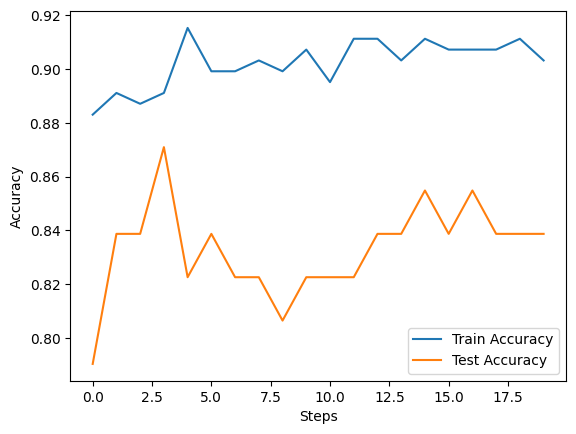

In [19]:
plt.plot(results['train_acc'], label='Train Accuracy')
plt.plot(results['test_acc'], label='Test Accuracy')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

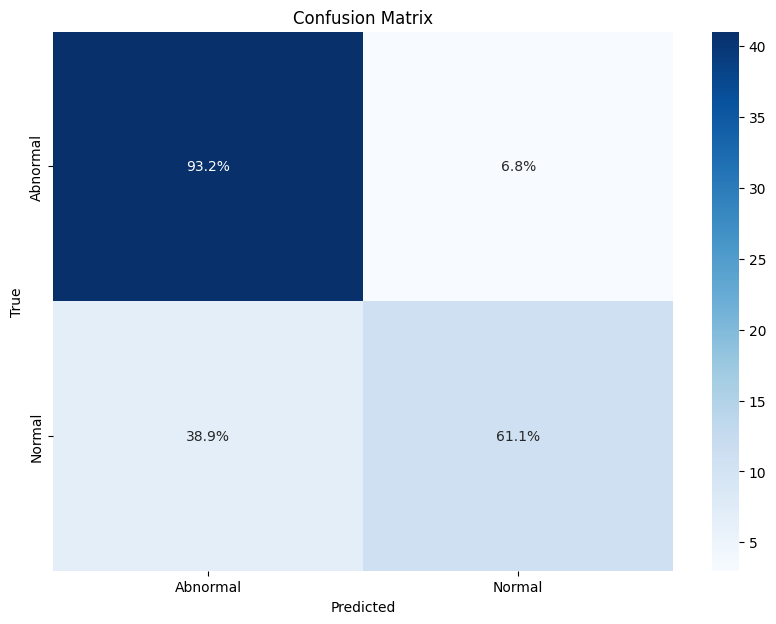

In [25]:
test_outputs = final_model(dataset['test_input'])
test_predictions = torch.argmax(test_outputs, dim=1).numpy()

conf_matrix = confusion_matrix(y_test, test_predictions)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

annot_labels = [['{:.1f}%'.format(value) for value in row] for row in conf_matrix_percent]

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=annot_labels, fmt='', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

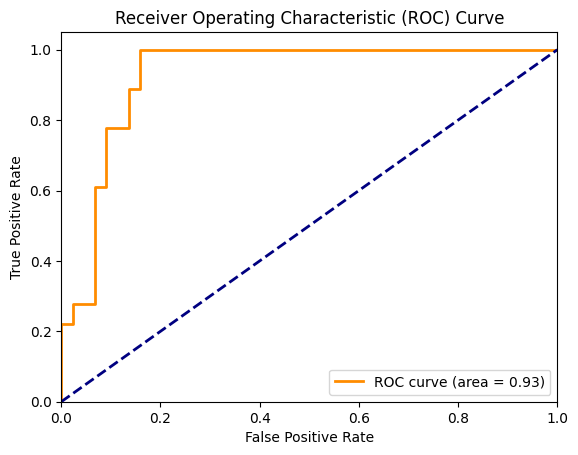

In [26]:
test_probs = torch.softmax(test_outputs, dim=1).detach().numpy()
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

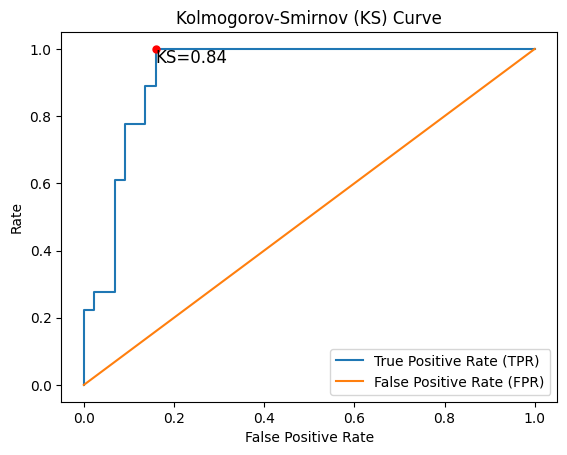

KS Statistic: 0.84


In [27]:
ks_statistic = np.max(tpr - fpr)
ks_idx = np.argmax(tpr - fpr)
plt.figure()
plt.plot(fpr, tpr, label='True Positive Rate (TPR)')
plt.plot(fpr, fpr, label='False Positive Rate (FPR)')
plt.plot([fpr[ks_idx]], [tpr[ks_idx]], marker='o', markersize=5, color="red")
plt.text(fpr[ks_idx], tpr[ks_idx], f'KS={ks_statistic:.2f}', fontsize=12, verticalalignment='top')
plt.xlabel('False Positive Rate')
plt.ylabel('Rate')
plt.title('Kolmogorov-Smirnov (KS) Curve')
plt.legend(loc='best')
plt.show()

print(f"KS Statistic: {ks_statistic:.2f}")

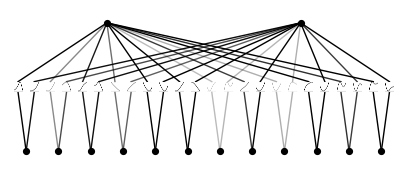

In [28]:
final_model.plot()